In [77]:
import random
import math
from alive_progress import alive_bar #progress bar for loops
import matplotlib.pyplot as plt
import numpy as np
import time
import heapq #min-heap priority queue

# PART A

Suppose the input graph G = (V, E) is stored in an adjacency matrix and we
use an array for the priority queue. Implement the Dijkstra’s algorithm using this
setting and analyze its time complexity with respect to |V| and |E| both
theoretically and empirically.

# PART B


Suppose the input graph G = (V, E) is stored in an array of adjacency lists and
we use a minimizing heap for the priority queue. Implement the Dijkstra’s
algorithm using this setting and analyze its time complexity with respect to |V|
and |E| both theoretically and empirically.

### Graph Generation

In [452]:
# Generating random graphs (array of adjacency lists)


def generate_random_graph(num_graphs, V, E, max_weight=10): 
    graphs = {V[_]: [] for _ in range(len(V))} if len(V)>1 else {E[_]:[ ] for _ in range(len(E))}
    # print(graphs)
    if len(V)>1:
        keys = V
    else:
        keys = E
    for i in range(len(V)):
        for j in range(num_graphs):
            for k in range(len(E)):
                graph = [[] for _ in range(V[i])]  # adjacency list representation
                edges_added = 0
                while edges_added < E[k]:  # ensure we add exactly E edges
                    u = random.randint(0, V[i]-1)
                    v = random.randint(0, V[i]-1)
                    if u != v and all(nei[0] != v for nei in graph[u]):  # avoid duplicates & self-loop
                        w = random.randint(1, max_weight)
                        graph[u].append((v, w))
                        edges_added += 1
                if len(V)>1:
                    graphs[keys[i]].append(graph)
                else:
                    graphs[keys[k]].append(graph)
    return graphs

# fixed num_edges = 20
random.seed(2025) 
vertex_size = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 25000, 27500] # number of vertices
graphs_fixed_E = generate_random_graph(10, vertex_size, [25000]) # 10 graphs for each vertex size

# fixed num_vertices = 10000
# random.seed(2025) 
edge_size = [10000, 15000, 20000, 25000, 30000, 60000, 70000] # number of edges
graphs_fixed_V = generate_random_graph(10, [10000], edge_size) 

# Sample graph
g = [
    [(1, 2), (2, 4)],  # neighbors of vertex 0 (neighbor, weight)
    [(2, 1)],           # neighbors of vertex 1
    [(3, 3)],           # neighbors of vertex 2
    []                  # neighbors of vertex 3
]



In [428]:
graphs_fixed_E

{2500: [[[(396, 8),
    (197, 2),
    (711, 9),
    (1010, 5),
    (1212, 8),
    (710, 9),
    (742, 3),
    (1532, 1),
    (1445, 7)],
   [(87, 7), (845, 5), (1609, 9), (2337, 3), (933, 6), (1017, 5), (721, 10)],
   [(2473, 9),
    (883, 2),
    (461, 8),
    (1620, 6),
    (633, 5),
    (1036, 2),
    (389, 5),
    (323, 10),
    (442, 7),
    (2344, 6),
    (2475, 5),
    (466, 7),
    (2225, 4),
    (94, 7),
    (391, 6),
    (1537, 7),
    (2493, 5)],
   [(2449, 6),
    (1260, 5),
    (499, 4),
    (99, 3),
    (366, 4),
    (672, 7),
    (866, 6),
    (1875, 3),
    (310, 1),
    (362, 7),
    (750, 5),
    (1672, 6)],
   [(1905, 8), (1492, 10), (1223, 3), (124, 8), (132, 2), (85, 8), (1379, 3)],
   [(747, 1),
    (1354, 4),
    (1115, 7),
    (1018, 3),
    (765, 9),
    (604, 5),
    (769, 7),
    (304, 1),
    (2091, 9),
    (783, 4),
    (1046, 1),
    (82, 10),
    (1874, 3),
    (2325, 3),
    (946, 7),
    (1480, 8)],
   [(242, 2),
    (491, 4),
    (1794, 4),
    (536, 2

In [456]:
def dijkstra_minheap(graph, start):
    V = len(graph)
    S = [False] * V
    d = [math.inf] * V
    pi = [None]* V
    pq = []
    heapq.heappush(pq, (0, start)) # (distance, vertex)

    d[start] = 0
    pi[start] = None
    
    comparisons = 0
    while pq:
        di, u = heapq.heappop(pq)
        if S[u]:
            continue
        else:
            for v, w in graph[u]:
                comparisons += 1
                if d[u] + w < d[v]: #found better path to v, update distance
                    d[v] = d[u] + w
                    pi[v] = u
                    heapq.heappush(pq, (d[v], v))
            S[u] = True
    
    return (d, pi, comparisons)

execution_time_fixedE = {}

for V, graphs_list in graphs_fixed_E.items():
    total = 0
    length = len(graphs_list)
    for j, graph in enumerate(graphs_list):
        # print(f"Running Dijkstra's for V={V}, graph {j+1}/{length}")
        # start = time.perf_counter()
        # dijkstra_minheap(graph, 0)
        total += dijkstra_minheap(graph, 0)[2]
        # end = time.perf_counter()
        # total += end - start
    execution_time_fixedE[V] = total / length

execution_time_fixedV = {}

for E, graphs_list in graphs_fixed_V.items():
    total = 0
    length = len(graphs_list)
    for j, graph in enumerate(graphs_list):
        # print(f"Running Dijkstra's for E={E}, graph {j+1}/{length}")
        # start = time.perf_counter()
        # dijkstra_minheap(graph, 0)
        total += dijkstra_minheap(graph, 0)[2]
        # end = time.perf_counter()
        # total += end - start
    execution_time_fixedV[E] = total / length

print("Comparisons for fixed E:", execution_time_fixedE)
print("Comparisons for fixed V:", execution_time_fixedV)

Comparisons for fixed E: {2500: 25000.0, 5000: 24831.2, 7500: 21554.1, 10000: 17904.0, 12500: 13997.6, 15000: 15247.2, 17500: 6600.2, 20000: 1949.8, 25000: 11.5, 27500: 7.3}
Comparisons for fixed V: {10000: 5.1, 15000: 5216.9, 20000: 9539.2, 25000: 20103.9, 30000: 25374.7, 60000: 59872.9, 70000: 69946.1}


### Theoretical comparisons

In the worst case,

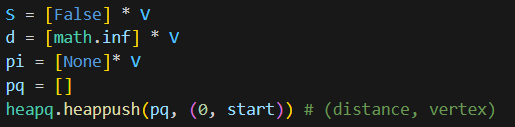<br>
 First 3 = $O(n)$ <br>
 Heap operation = $O(log \ 1)$ = $O(1)$ <br>
 Total = $O(V)$ <br>

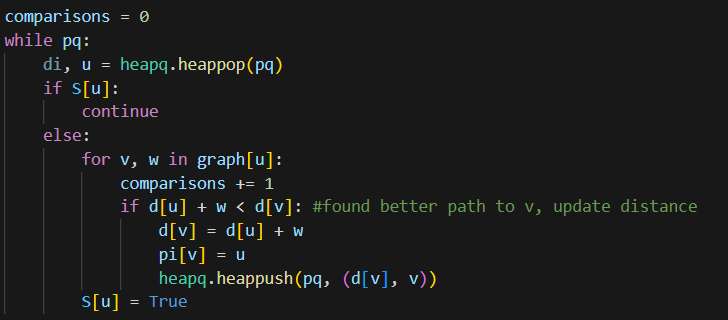<br>
Each edge is pushed into the heap once per inner loop, potentially multiple times <br>
Maximum number of heappush operations: $O(E)$ (one per edge)<br>
Maximum number of heappop operations: $O(V + E)$<br>
Each heap operation = $O(log \ V)$<br>
Heap operations: $O((V + E) \ log \  V)$<br>
Edge comparisons: $O(E)$ <br>
Initialization: $O(V)$<br>
Total: $$O((V + E) \ log \  V)$$

In [457]:
# estimating execution time of one operation
fixedE = list(execution_time_fixedE.values())
totalfixedE = 0
j = 0
for i in vertex_size:
    totalfixedE += fixedE[j] / (25000 + i) * math.log2(i)
    j += 1
time_per_op_fixedE = totalfixedE / len(vertex_size)

print("Estimated time per operation (fixed E):", time_per_op_fixedE)

fixedV = list(execution_time_fixedV.values())
totalfixedV = 0
j = 0
for i in edge_size:
    # print(i)
    totalfixedV += (fixedV[j] / (10000 + i) * math.log2(10000))
    j += 1
time_per_op_fixedV = totalfixedV / len(edge_size)

print("Estimated time per operation (fixed V):", time_per_op_fixedV)

def theoretical_comparisons(V, E):
    return (E + V) * math.log2(V)

theoretical_results_fixedV = {S: theoretical_comparisons(10000, S) for S in edge_size}
theoretical_results_fixedE = {S: theoretical_comparisons(S, 25000) for S in vertex_size}   

Estimated time per operation (fixed E): 4.894808658957814
Estimated time per operation (fixed V): 6.578029563189096


### Plotting time taken against number of vertices, V

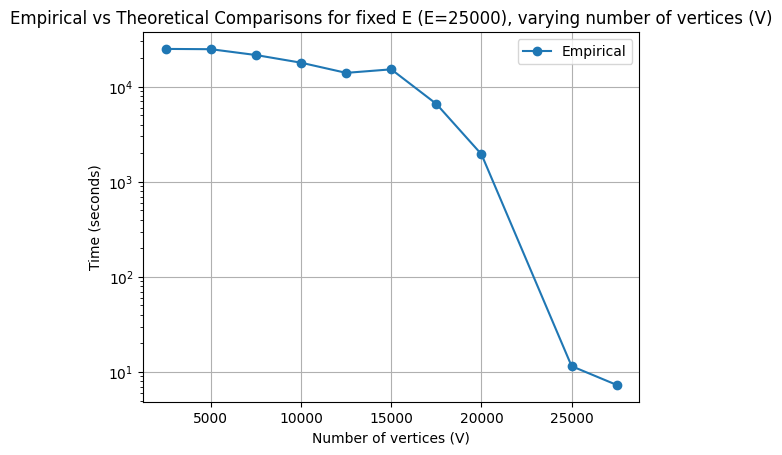

In [459]:
# plotting empirical vs theoretical results
plt.plot(list(execution_time_fixedE.keys()), list(execution_time_fixedE.values()), label="Empirical", marker="o")
# plt.plot(list(theoretical_results_fixedE.keys()), list(theoretical_results_fixedE.values()),
# label="Theoretical", linestyle="--", marker="x")

plt.xlabel("Number of vertices (V)")
plt.ylabel("Time (seconds)")
plt.yscale("log")
plt.title(f"Empirical vs Theoretical Comparisons for fixed E (E=25000), varying number of vertices (V)")
plt.legend()
plt.grid(True)
plt.show()

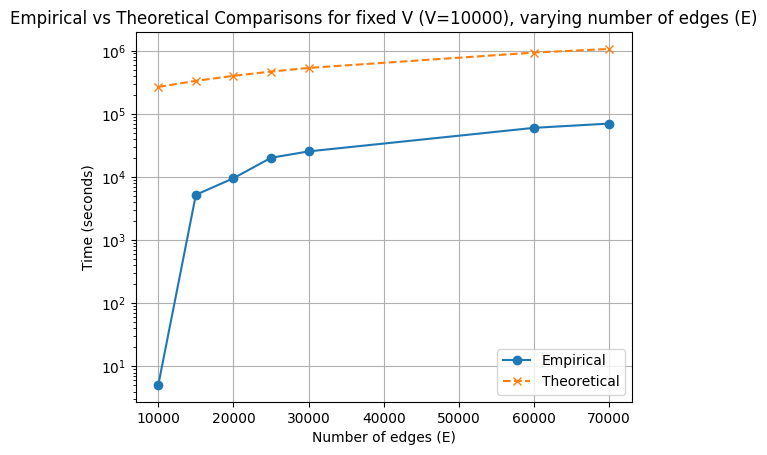

In [462]:
# plotting empirical vs theoretical results
plt.plot(list(execution_time_fixedV.keys()), list(execution_time_fixedV.values()), label="Empirical", marker="o")
plt.plot(list(theoretical_results_fixedV.keys()), list(theoretical_results_fixedV.values()),label="Theoretical", linestyle="--", marker="x")

plt.xlabel("Number of edges (E)")
plt.ylabel("Time (seconds)")
plt.yscale("log")
plt.title(f"Empirical vs Theoretical Comparisons for fixed V (V=10000), varying number of edges (E)")
plt.legend()
plt.grid(True)
plt.show()

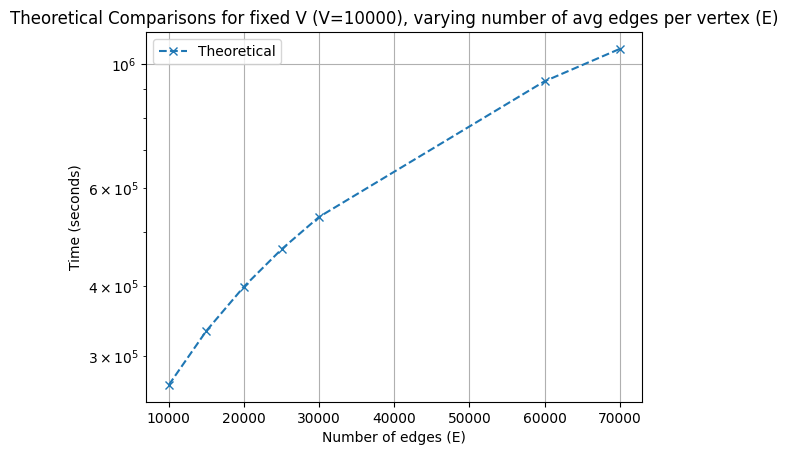

In [463]:
plt.plot(list(theoretical_results_fixedV.keys()), list(theoretical_results_fixedV.values()),label="Theoretical", linestyle="--", marker="x")

plt.xlabel("Number of edges (E)")
plt.ylabel("Time (seconds)")
plt.yscale("log")
plt.title(f"Theoretical Comparisons for fixed V (V=10000), varying number of avg edges per vertex (E)")
plt.legend()
plt.grid(True)
plt.show()